In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Data
temperatures = np.array([14.2, 16.4, 11.9, 15.2, 18.5, 22.1, 19.4, 21, 25.1, 23.4, 18.1, 22.6, 17.2])
sales = np.array([215, 325, 185, 332, 406, 522, 412, 450, 614, 544, 421, 445, 408])


# Generating some sample data where alpha = 3 , beta = 4
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)

In [25]:
def plot_results(a, b, X, Y):
    # Display calculated coefficients
    print("'\n\n'Coefficient a for data (slope) :", a)
    print("Coefficient b for data (y-intercept) :", b)
    # Plot data with the linear regression line 
    plt.scatter(X, Y, label='Data')
    plt.plot(X, a * X + b, color='red', label='Linear Regression')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Relationship between X and Y')
    plt.legend()
    plt.show()

In [18]:
def predict_X(a,b,values_to_predict,method):
    
    for value in values_to_predict:
        predicted = (value - b) / a
        print(f"Using {method} : For a temprature of {value} °C, Predicted sales are : {predicted}")

Coefficient a for data (slope) : 0.030471388740135594
Coefficient b for data (y-intercept) : 6.412805314490434


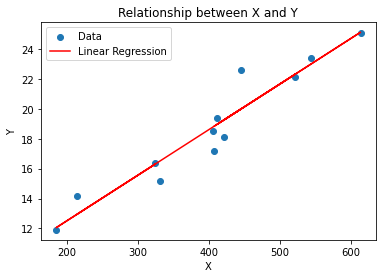

Coefficient a for data (slope) : 3.15604277650793
Coefficient b for data (y-intercept) : 3.8696637992702656


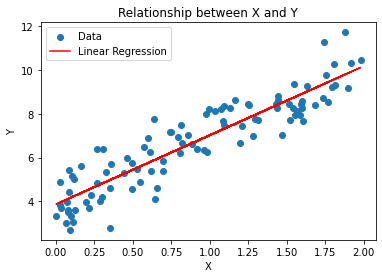

In [14]:
def linear_regression_using_covariance(X, Y):
    # Calculate means
    mean_Y = np.mean(Y)
    mean_X = np.mean(X)

    # Calculate variances and covariance
    covariance = np.sum((Y - mean_Y) * (X - mean_X))
    variance_sales = np.sum((X - mean_X) ** 2)

    # Calculate coefficients a and b for linear regression
    a = covariance / variance_sales
    b = mean_Y - a * mean_X

    return a, b

# Apply linear regression using covariance
a_sales_cov, b_sales_cov = linear_regression_using_covariance(sales, temperatures)
a_generated_cov, b_generated_cov = linear_regression_using_covariance(X, Y)

#Display for sales data 
plot_results(a_sales_cov,b_sales_cov,sales,temperatures)

#Display for generated data 
plot_results(a_generated_cov,b_generated_cov,X,Y)


'

'Coefficient a for data (slope) : 0.030688730326091936
Coefficient b for data (y-intercept) : 6.391860969889279


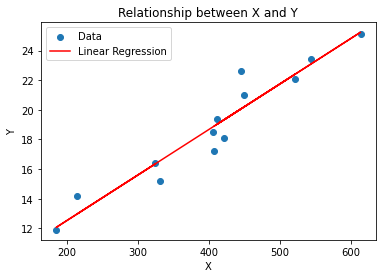

Using least square : For a temprature of 13 °C, Predicted sales are : 215.32787312782372
Using least square : For a temprature of 20 °C, Predicted sales are : 443.42463456498604
Using least square : For a temprature of 27 °C, Predicted sales are : 671.5213960021483
'

'Coefficient a for data (slope) : 2.863626465943462
Coefficient b for data (y-intercept) : 4.170596616650141


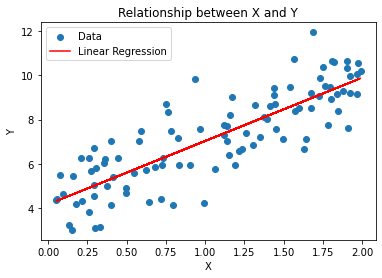

In [33]:
def least_square(X, Y):
    n = len(X)
    sum_X = np.sum(X)
    sum_Y = np.sum(Y)
    sum_XY = np.sum(X * Y)
    sum_X_squared = np.sum(X ** 2)

    a_hat = (n * sum_XY - sum_X * sum_Y) / (n * sum_X_squared - sum_X ** 2)
    b_hat = (sum_Y - a_hat * sum_X) / n

    return a_hat, b_hat

# Apply linear regression using least square method
a_sales_ls, b_sales_ls = least_square(sales, temperatures)
a_generated_ls, b_generated_ls = least_square(X, Y)

#Display for sales data 
plot_results(a_sales_ls,b_sales_ls,sales,temperatures)

#Apply to predict exercice data:
predict_X(a_sales_ls,b_sales_ls,[13,20,27],"least square")


#Display for generated data 
plot_results(a_generated_ls,b_generated_ls,X,Y)

'

'Coefficient a for data (slope) : 0.0446654663184255
Coefficient b for data (y-intercept) : 0.00011453370152398067


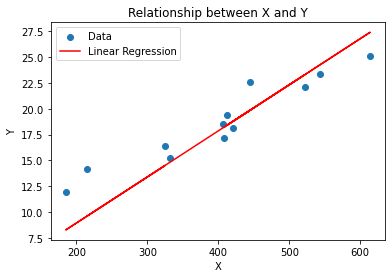

'

'Coefficient a for data (slope) : 3.25541726139002
Coefficient b for data (y-intercept) : 3.6736258039026546


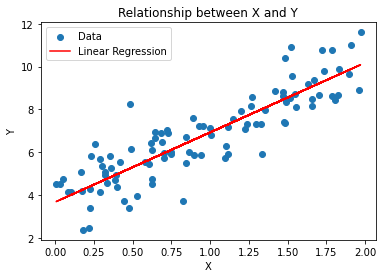

In [31]:
import numpy as np

# Gradient Descent Function with Derivatives
def gradient_descent(X, Y, learning_rate=0.01, threshold=0.0001):
    a = 0
    b = 0
    n = len(X)

    for epoch in range(1000):  # Adjust the maximum number of epochs if needed
        y_pred = a * X + b
        error = y_pred - Y
        
        # Calculate derivatives for coefficients a and b
        gradient_a = (1 / n) * np.sum(error * X)
        gradient_b = (1 / n) * np.sum(error)

        # Update coefficients using gradients
        a_prev, b_prev = a, b
        a -= learning_rate * gradient_a
        b -= learning_rate * gradient_b

        # Check if change in coefficients is smaller than threshold
        if abs(a - a_prev) < threshold and abs(b - b_prev) < threshold:
            break

    return a, b


# Apply linear regression using gradient descent method
# We needed to change the learning_rate because the algorithme seems to take big steps without reaching a solution
a_sales_gd, b_sales_gd = gradient_descent(sales, temperatures,0.000001)
a_generated_gd, b_generated_gd = gradient_descent(X, Y)


#Display for sales data 
plot_results(a_sales_gd,b_sales_gd,sales,temperatures)

#Display for generated data 
plot_results(a_generated_gd,b_generated_gd,X,Y)

In [7]:
# Root Mean Square Error (RMSE) Function
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [6]:
def r_squared(y_true, y_pred):
    ss_mean = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_residual / ss_mean)
    return r2

In [8]:
a_ls, b_ls = least_square(X, Y)
Y_pred_ls = a_ls * X + b_ls
r2_ls = r_squared(Y, Y_pred_ls)
rmse_ls = rmse(Y, Y_pred_ls)

# Calculating metrics for Gradient Descent Method
a_gd, b_gd = gradient_descent(X, Y)
Y_pred_gd = a_gd * X + b_gd
r2_gd = r_squared(Y, Y_pred_gd)
rmse_gd = rmse(Y, Y_pred_gd)

# Printing results
print("Results for Least Squares Method:")
print("R-squared (Coefficient of Determination) :", r2_ls)
print("Root Mean Square Error (RMSE) :", rmse_ls)
print("\nResults for Gradient Descent Method:")
print("R-squared (Coefficient of Determination) :", r2_gd)
print("Root Mean Square Error (RMSE) :", rmse_gd)

Results for Least Squares Method:
R-squared (Coefficient of Determination) : 0.8025157100392739
Root Mean Square Error (RMSE) : 0.8915256019083876

Results for Gradient Descent Method:
R-squared (Coefficient of Determination) : 0.8003756348577071
Root Mean Square Error (RMSE) : 0.8963431768129244
